In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [15]:
df = pd.read_csv("adsclick.csv")
df.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


**Clicks**

In [16]:
df["is_click"] = ~df["ad_click_timestamp"].isnull()
df.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


In [17]:
df["is_click"] = df["is_click"].astype("string")
df.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


**Statistical Analysis**

In [18]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1654 non-null   object
 1   utm_source          1654 non-null   object
 2   day                 1654 non-null   object
 3   ad_click_timestamp  565 non-null    object
 4   experimental_group  1654 non-null   object
 5   is_click            1654 non-null   string
dtypes: object(5), string(1)
memory usage: 77.7+ KB


In [19]:
# Check Null Values
df.isnull().sum()

user_id                  0
utm_source               0
day                      0
ad_click_timestamp    1089
experimental_group       0
is_click                 0
dtype: int64

In [20]:
# Stats
df.describe()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
count,1654,1654,1654,565,1654,1654
unique,1654,4,7,464,2,2
top,6cd685f6-076a-417a-baab-b980c3dfa937,google,5 - Friday,9:18,B,False
freq,1,680,256,4,827,1089


**Traffic from different sources**

In [21]:
traffic = df["utm_source"].value_counts().to_frame().reset_index()
traffic.columns = ["Source", "Traffic"]
traffic["Percentage"] = (traffic["Traffic"] / sum(traffic["Traffic"])) * 100
traffic

,Source,Traffic,Percentage
0,google,680,41.112455
1,facebook,504,30.471584
2,email,255,15.417170
3,twitter,215,12.998791


**Clicks by Source**

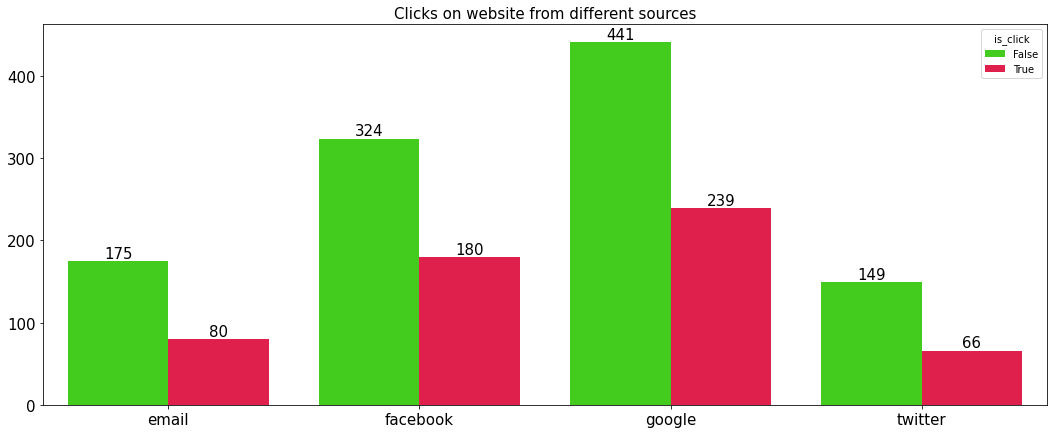

In [46]:
clicks_by_source = df.groupby(["utm_source", "is_click"])["user_id"].agg(["count"]).reset_index()

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "utm_source", y = "count", hue = "is_click", data = clicks_by_source, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Clicks on website from different sources", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Pivot Table**

In [23]:
clicks_pivot = clicks_by_source.pivot(columns = "is_click", index = "utm_source", values = "count").reset_index()
clicks_pivot

is_click,utm_source,False,True
0,email,175,80
1,facebook,324,180
2,google,441,239
3,twitter,149,66


**Percent Clicked**

In [24]:
clicks_pivot["Percent Clicked"] = clicks_pivot["True"] / (clicks_pivot["True"] + clicks_pivot["False"])
clicks_pivot

is_click,utm_source,False,True,Percent Clicked
0,email,175,80,0.313725
1,facebook,324,180,0.357143
2,google,441,239,0.351471
3,twitter,149,66,0.306977


**Experimental Groups**

In [25]:
click_exp = df.groupby("experimental_group")["user_id"].agg(["count"]).reset_index()
click_exp

,experimental_group,count
0,A,827
1,B,827


**Experimental Group Clicks**

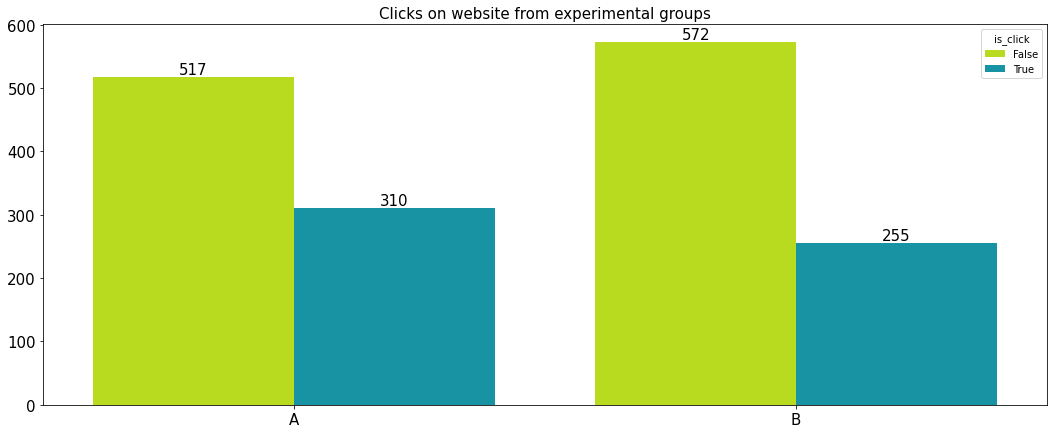

In [58]:
clicks_eg = df.groupby(["experimental_group", "is_click"])["user_id"].agg(["count"]).reset_index()
clicks_eg

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "experimental_group", y = "count", hue = "is_click", data = clicks, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Clicks on website from experimental groups", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**Pivot Experimental Group Clicks**

In [31]:
pivot_eg = clicks_eg.pivot(index = "experimental_group", columns = "is_click", values = "count").reset_index()
pivot_eg

is_click,experimental_group,False,True
0,A,517,310
1,B,572,255


**A & B Clicks Data**

In [33]:
# A Clicks
a_clicks = df[df["experimental_group"] == "A"]
a_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False


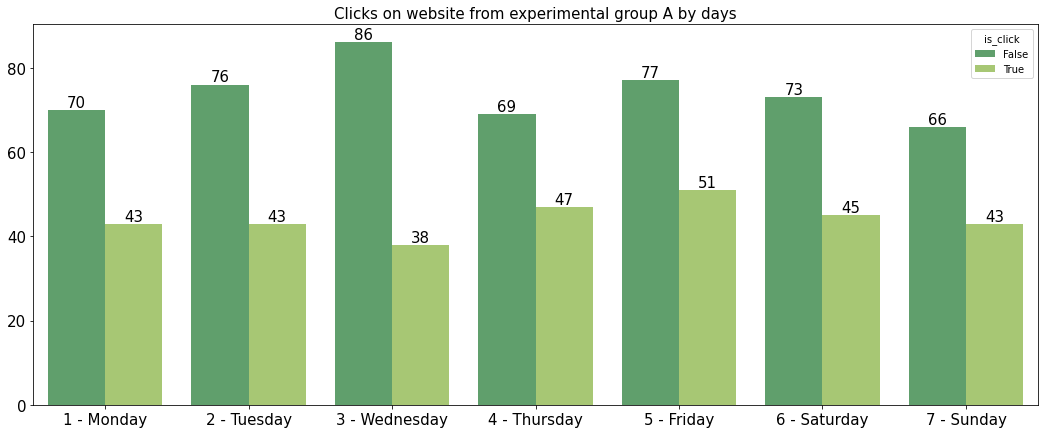

In [61]:
# A group clicks by days
a_clicks_days = a_clicks.groupby(["is_click", "day"])["user_id"].agg(["count"]).reset_index()
a_clicks_days

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "day", y = "count", hue = "is_click", data = a_clicks_days, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Clicks on website from experimental group A by days", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

In [40]:
# Pivot A group clicks by days
a_clicks_days_pivot = a_clicks_days.pivot(index = "day", columns = "is_click", values = "count").reset_index()
a_clicks_days_pivot["Percent Clicked"] = a_clicks_days_pivot["True"] / (a_clicks_days_pivot["True"] + a_clicks_days_pivot["False"])
a_clicks_days_pivot

is_click,day,False,True,Percent Clicked
0,1 - Monday,70,43,0.380531
1,2 - Tuesday,76,43,0.361345
2,3 - Wednesday,86,38,0.306452
3,4 - Thursday,69,47,0.405172
4,5 - Friday,77,51,0.398438
5,6 - Saturday,73,45,0.381356
6,7 - Sunday,66,43,0.394495


In [35]:
# B Clicks
b_clicks = df[df["experimental_group"] == "B"]
b_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True
10,01adb2e7-f711-4ae4-a7c6-29f48457eea1,google,3 - Wednesday,NaN,B,False


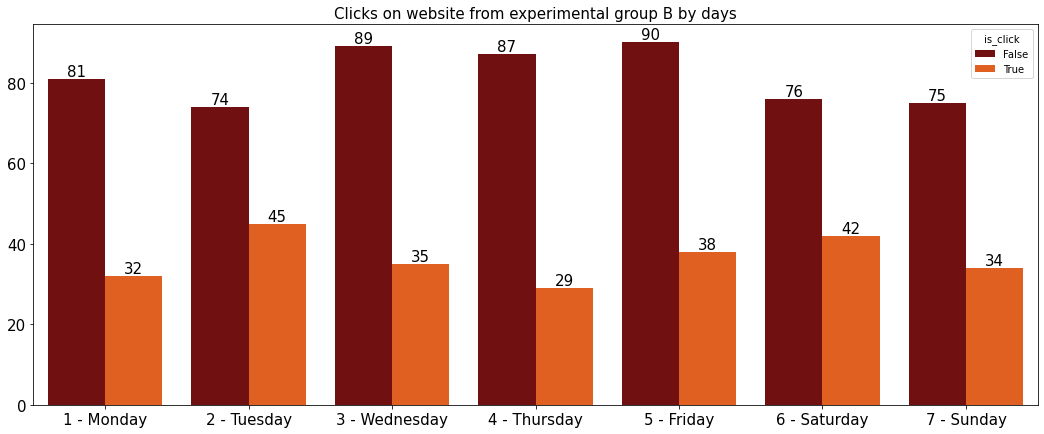

In [64]:
# B group clicks by days
b_clicks_days = b_clicks.groupby(["is_click", "day"])["experimental_group"].agg(["count"]).reset_index()
b_clicks_days

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "day", y = "count", hue = "is_click", data = b_clicks_days, palette = "gist_heat")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Clicks on website from experimental group B by days", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

In [45]:
# Pivot B group clicks by days
b_clicks_days_pivot = b_clicks_days.pivot(index = "day", columns = "is_click", values = "count").reset_index()
b_clicks_days_pivot["Percent Clicked"] = b_clicks_days_pivot["True"] / (b_clicks_days_pivot["True"] + b_clicks_days_pivot["False"])
b_clicks_days_pivot

is_click,day,False,True,Percent Clicked
0,1 - Monday,81,32,0.283186
1,2 - Tuesday,74,45,0.378151
2,3 - Wednesday,89,35,0.282258
3,4 - Thursday,87,29,0.250000
4,5 - Friday,90,38,0.296875
5,6 - Saturday,76,42,0.355932
6,7 - Sunday,75,34,0.311927
